# Eurovision 2018 Predictions

In [1]:
from nlp_functions import *

/Users/danaiavg/anaconda/lib/python2.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [19]:
def cluster_assignment(text):
    tops = []
    for i in topics:
        for j in dictionary_of_topics[i]:
            if text in j:
                tops.append((j[0], i))
    max1 = 0
    best_topic = ''
    for k in tops:
        if k[0] > max1:
            max1 = k[0]
            best_topic = k[1]
    return [best_topic, max1]

In [2]:
eurovision_data = pd.read_csv('./eurovision_.csv')

## Term Frequency

In [3]:
# removing duplicates
eurovision_data = eurovision_data.drop_duplicates(subset=['tweet'], keep='first')
# applying tokenizer 
eurovision_data["tokenized_tweet"] = eurovision_data['tweet'].apply(tokenizer)

In [4]:
# manually removing duplicates that were not captured
eurovision_data = eurovision_data[eurovision_data.tweet.str.contains("RT BBCSteveR") == False]
# term frequency
term_frequency = eurovision_data['tokenized_tweet'].str.split(expand=True).stack().value_counts().head(10)
print('##term frequency##')
print(term_frequency)

##term frequency##
song         98
final        74
esc          73
year         65
like         58
allaboard    55
time         51
earli        48
vote         45
tonight      44
dtype: int64


In [5]:
val_counts = eurovision_data['tokenized_tweet'].str.split(expand=True).stack().value_counts()
val_counts_df = pd.DataFrame({'index':val_counts.index, 'values':val_counts.values})

In [6]:
data = [go.Bar(
            x=val_counts_df['index'][:10],
            y=val_counts_df['values'][:10]
    )]

layout = go.Layout(
    autosize = False,
    title = "Term Frequency",
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=17,
        )
    ),
   
    xaxis = dict(
        title='Term',
        titlefont=dict(
            size=17,
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(titlefont=dict(size=20))
iplot(fig)

## Sentiment Analysis

In [7]:
eurovision_data = tweet_sentiment(eurovision_data, 'tweet')

## TFI-DF

In [8]:
eurovision_data['tok'] = eurovision_data['tokenized_tweet'].str.split()

In [34]:
tfidf = tweet_tfidf(eurovision_data, 'tokenized_tweet', 20)

In [10]:
data = [go.Bar(
            x=tfidf['term'][:15],
            y=tfidf['weight'][:15]
    )]

layout = go.Layout(
    autosize = False,
    title = "Term Frequency",
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=17,
        )
    ),
   
    xaxis = dict(
        title='Term',
        titlefont=dict(
            size=17,
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(titlefont=dict(size=20))
iplot(fig)

## LDA- Topic modelling

In [11]:
topics, ldamodel, corpus, dictionary = tweet_topic_modelling(eurovision_data, 'tok', 9)

In [12]:
print('##Common Topics##')
for i in topics:
    print(i)

##Common Topics##
song winner just esc
s song earli year
song like year esc
vote time like got
final semi cest allaboard
point card tt espaa
odd song esc vote
year perform night israel
esc allaboard like earli


In [13]:
data = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
data

/Users/danaiavg/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      15.431452        1       1 -0.113354  0.135198
2      13.000628        1       2  0.087925  0.008165
4      12.304537        1       3  0.103572 -0.042719
7      11.113919        1       4 -0.002715 -0.001833
3      10.671965        1       5 -0.011685  0.067592
5      10.401763        1       6 -0.137705 -0.149014
1      10.359759        1       7  0.033956 -0.033280
0       9.738115        1       8  0.045248  0.010104
8       6.977855        1       9 -0.005243  0.005786, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
1057  Default  23.000000           s  23.000000  30.0000  30.0000
1786  Default  26.000000        semi  26.000000  29.0000  29.0000
1939  Default  20.000000         odd  20.000000  28.0000  28.0000
1667  Default  29.000000       point  29.000000  27.0000  27.0000
881   Default  14.000000        card  14.000000  26.0000  26.0000
1284  Default  72.000000        song  72.000000  25.0000  25.0000
2095  Default  25.000000        cest  25.000000  24.0000  24.0000
2141  Default  54.000000       final  54.000000  23.0000  23.0000
245   Default  13.000000        rank  13.000000  22.0000  22.0000
1274  Default  10.000000          tt  10.000000  21.0000  21.0000
908   Default  34.000000        vote  34.000000  20.0000  20.0000
1712  Default  34.000000       earli  34.000000  19.0000  19.0000
193   Default   8.000000       espaa   8.000000  18.0000  18.0000
35    Default   9.000000      second   9.000000  17.0000  17.0000
2209  Default  17.000000      winner  17.000000  16.0000  16.0000
2268  Default   7.000000          ce   7.000000  15.0000  15.0000
2404  Default  53.000000         esc  53.000000  14.0000  14.0000
1360  Default  29.000000      israel  29.000000  13.0000  13.0000
2477  Default  25.000000     contest  25.000000  12.0000  12.0000
2378  Default  42.000000        like  42.000000  11.0000  11.0000
979   Default   6.000000        beti   6.000000  10.0000  10.0000
1788  Default   6.000000   amaiaalfr   6.000000   9.0000   9.0000
449   Default  14.000000        make  14.000000   8.0000   8.0000
698   Default  10.000000        juri  10.000000   7.0000   7.0000
1853  Default   7.000000        info   7.000000   6.0000   6.0000
533   Default   9.000000         plu   9.000000   5.0000   5.0000
1967  Default  25.000000         win  25.000000   4.0000   4.0000
1060  Default  10.000000         key  10.000000   3.0000   3.0000
1677  Default   9.000000          pt   9.000000   2.0000   2.0000
1964  Default   9.000000       chanc   9.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
2151   Topic9   1.314065       haven   2.719279   1.9352  -5.8529
788    Topic9   0.709611        beam   1.357112   2.0140  -6.4691
2015   Topic9   0.709611     clayman   1.357112   2.0140  -6.4691
1499   Topic9   3.009874     qualifi   7.586982   1.7379  -5.0241
1192   Topic9   1.970922    eurosemi   4.837389   1.7646  -5.4475
449    Topic9   3.739403        make  14.039096   1.3395  -4.8071
538    Topic9   1.345870        post   3.415060   1.7313  -5.8290
2404   Topic9   8.056155         esc  53.481091   0.7695  -4.0396
2411   Topic9   5.388141   allaboard  40.285332   0.6506  -4.4418
1712   Topic9   4.724025       earli  34.826462   0.6647  -4.5734
1360   Topic9   4.282663      israel  29.136436   0.7450  -4.6714
2378   Topic9   4.930083        like  42.455841   0.5093  -4.5307
634    Topic9   4.541828        time  37.523998   0.5508  -4.6127
1479   Topic9   1.987022      realli   8.452963   1.2145  -5.4394
1057   Topic9   2.814505           s  23.970200   0.5204  -5.0912
1284   Topic9   4.007695        song  72.240311  -0.2294  -4.7378
713    Topic9   1.986975        love  18.022057   0.4574  -5.4394
2308   Topic9   1.864935          ve  13.031954   0.7183  -5.50

In [14]:
lda_corpus = ldamodel[corpus]

In [15]:
documents = eurovision_data['tokenized_tweet'].tolist()

In [16]:
dictionary_of_topics = {}
for k in range(len(topics)):
    k_texts = []
    for i, j in zip(lda_corpus,documents):
        for l in i:
            if l[0] == k:
                k_texts.append((l[1], j))
    dictionary_of_topics[topics[k]] = k_texts

In [20]:
eurovision_data['topic'] = eurovision_data['tokenized_tweet'].apply(cluster_assignment)

In [21]:
eurovision_data['score'] = eurovision_data['topic'].str[1]
eurovision_data['topic'] = eurovision_data['topic'].str[0]

## Country Frequency

In [22]:
# country list feature creation
eurovision_data['countries_mentioned'] = eurovision_data['tok'].apply(country_feature)

In [23]:
country_mentioned_frequency = list(chain.from_iterable(eurovision_data['countries_mentioned'].tolist()))

In [24]:
dict1 = Counter(country_mentioned_frequency)
val_counts_df = pd.DataFrame({'index':list(dict1.keys()), 'values':list(dict1.values())}).sort_values(by=['values'], ascending=False)
data = [go.Bar(
            x=val_counts_df['index'][:10],
            y=val_counts_df['values'][:10]
    )]

layout = go.Layout(
    autosize = False,
    title = "Term Frequency",
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=17,
        )
    ),
   
    xaxis = dict(
        title='Term',
        titlefont=dict(
            size=17,
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(titlefont=dict(size=20))
iplot(fig)

# Analysis

In [25]:
israel = eurovision_data[eurovision_data.countries_mentioned.apply(lambda x: 'israel' in x)]

In [30]:
topics, ldamodel, corpus, dictionary = tweet_topic_modelling(israel, 'tok', 4)

In [31]:
print('##Common Topics##')
for i in topics:
    print(i)

##Common Topics##
israel esc win time
israel year know journal
israel palestinian kill isra
israel entri injur tonight


In [29]:
lda_corpus = ldamodel[corpus]
documents = eurovision_data['tokenized_tweet'].tolist()

In [32]:
list_ = []
for i, j in zip(lda_corpus, documents):
    max_ = 0
    for k in i:
        if k[1] > max_:
            max_ = k[1]
            ind = k[0]
    list_.append((ind, j))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ee03590>]],
      dtype=object)

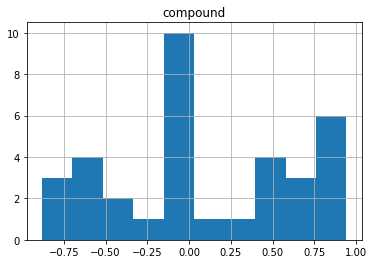

In [33]:
israel.hist(column='compound', bins=10)